**R入門（その11）**

---
**このノートブックについて**<br>
このColabのノートブック「R入門（その11）」では「ggplot2でグラフを作成する方法」を解説します。（追加で矢野がお気に入りのpatchworkとggthemesというパッケージも紹介します。）

<br>すでに「[R入門（その1）](https://colab.research.google.com/github/koiti-yano/colab/blob/main/経済統計_R入門_01_basic.ipynb)」と「[R入門（その10）](https://colab.research.google.com/github/koiti-yano/colab/blob/main/%E7%B5%8C%E6%B8%88%E7%B5%B1%E8%A8%88_R%E5%85%A5%E9%96%80_10_pipe.ipynb)」を読んでいることを前提に説明します。未読の人はその2つを先に読んでください。
<br>
> 注：このノートブックは駒澤大学経済学部で開講している「経済統計a/b」で「Excel以外の手法を学ぶ意欲がある履修生向け」に**最低限の知識**だけ解説する**補助資料**です

**参考文献**<br>
https://ggplot2.tidyverse.org/reference/index.html<br>
https://r4ds.had.co.nz/data-visualisation.html<br>
https://r4ds.had.co.nz/graphics-for-communication.html


**最初に呪文（全オブジェクトの削除）**<br>最初にちょっとした呪文を入れましょう。<br>（補足：以下の呪文rm(list=ls())は既にあるオブジェクトを全部削除するコマンドです。必須ではありませんが、場合によってはトラブルを避けるために役立つことがあります。）


In [ ]:
rm(list=ls())

パッケージtidyverseを読み込みます（ggplot2はtidyverseに含まれています）。

In [17]:
require(tidyverse)

Rに最初から組み込まれているmtcarsというデータフレーム（データセット）を使って、「ggplot2の基本的な書き方」を確認してみましょう。まず、head()を使ってどのようなデータなのか確認してみましょう（mtcarsの詳細はわからなくて構いません）。

In [19]:
mtcars |> head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


mtcarsのwtをx軸（横軸）、mpgをy軸（縦軸）にして散布図をプロットしてみましょう。ggplot2では以下のように入力します（最初は詳細がわからなくて構いません）。

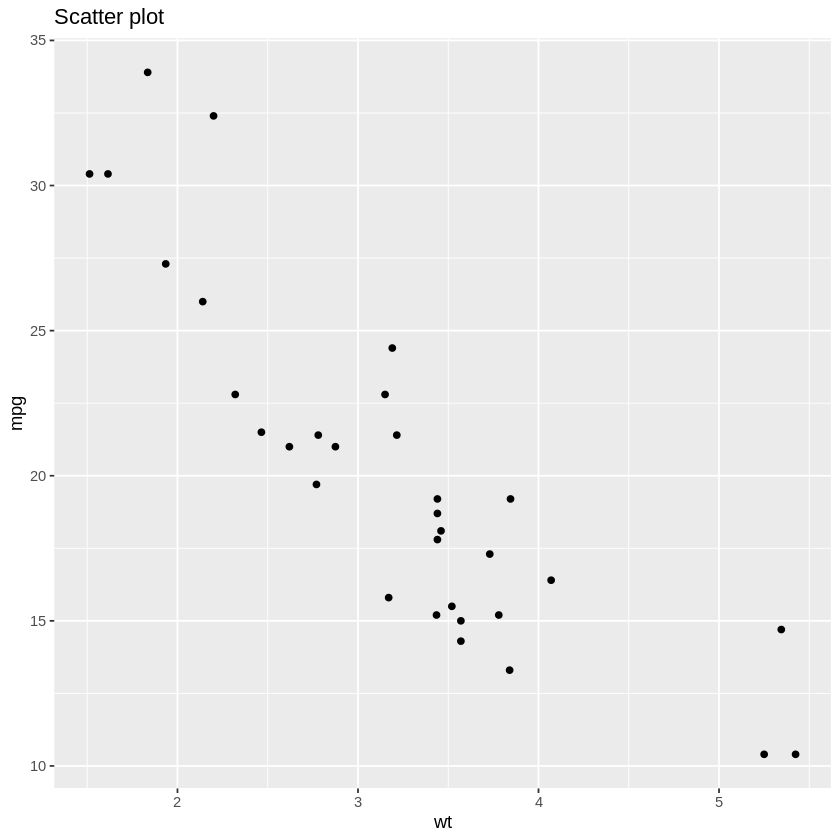

In [20]:
mtcars |> ggplot() + aes(x=wt, y=mpg) + geom_point() + labs(title="Scatter plot")

途中に+（プラス）記号が入っています。+は通常は数値の足し算を意味するのですが、ggplot2では「ある関数（たとえばggplot()）に新しい関数の機能を追加する＝グラフに新しい要素を追加する」ということを意味します。

正確ではありませんが、大雑把なイメージは以下の図のようになります。

ggolot2の発想（かなり適当なイメージ）

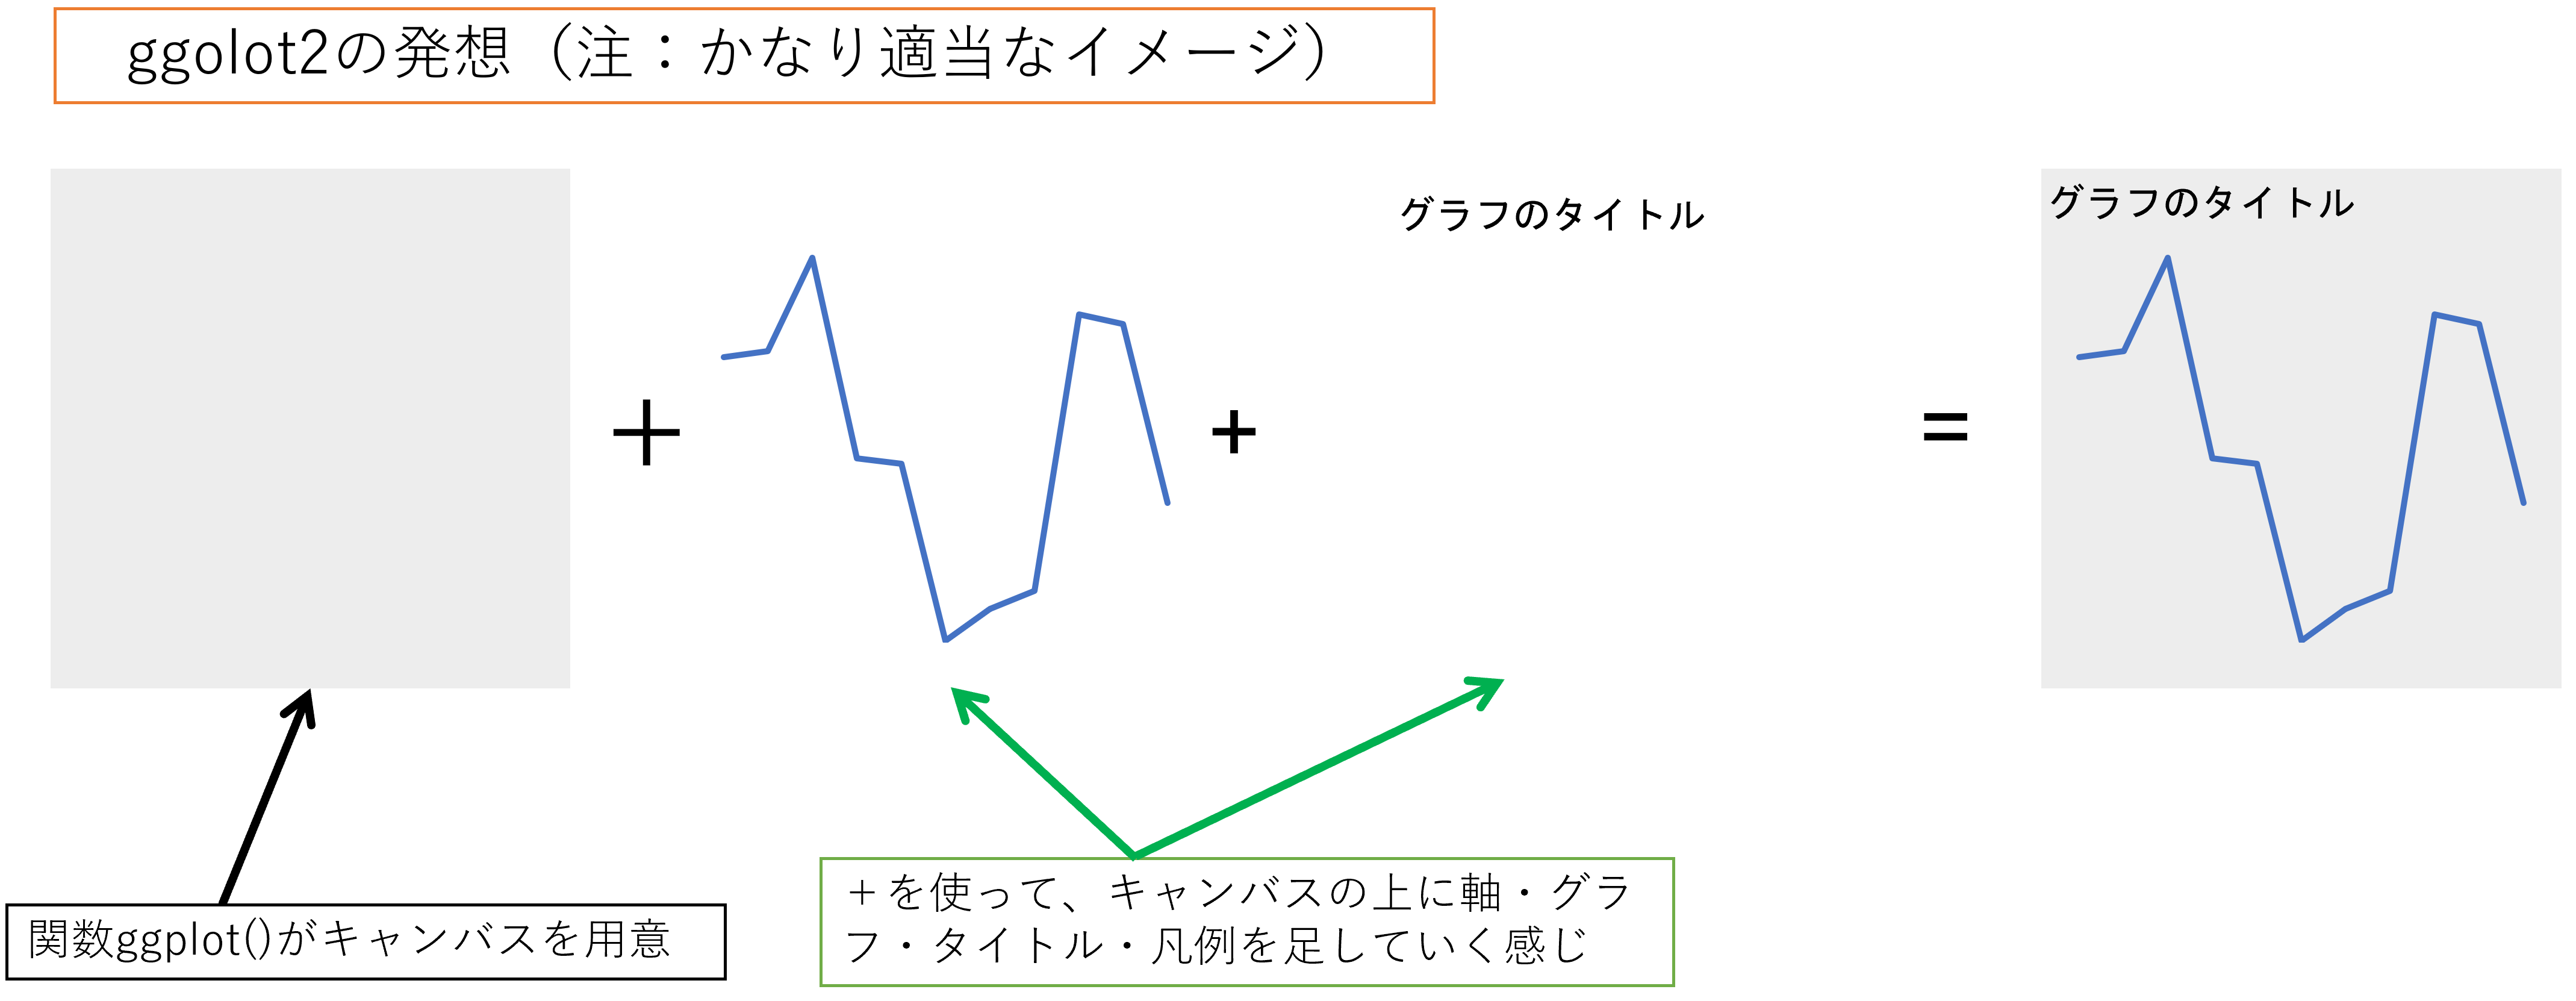

https://ggplot2.tidyverse.org/reference/index.html

Plotの基本

| 関数 |  機能  | 
| ---- | ---- |
|  ggplot()  |  グラフを表示する領域を作成  |
|  aes()  |  x軸（横軸)・y軸（縦軸）等の指定  |


Goemの基本

| TH |  TH  | 
| ---- | ---- |
|  geom_line()  |  TD  |
|  geom_bar()  |  TD  |
|  geom_hist()  |  TD  |
|  geom_point()  |  TD  |
|  aes()  |  TD  |


In [21]:
ice_df <- read.csv("https://www.dropbox.com/s/2ky13qi387j8b05/kion_iceCream.csv?raw=1",header=T)
ice_df |> head()

,年月,気温,アイスクリーム支出金額
,<chr>,<dbl>,<int>
1,2005年4月,15.1,541
2,2005年5月,17.7,666
3,2005年6月,23.2,801
4,2005年7月,25.6,1033
5,2005年8月,28.1,1175
6,2005年9月,24.7,737


これでice_dfという変数にデータが入力されました。このicd_dfにどのようなデータが入っているかを確認してみましょう。View()、head()、tail()などの関数を使います。すでに解説しましたが、head()は上から6行を表示する関数です。


https://fujinitaka.hatenablog.com/entry/2018/07/08/022044


In [22]:
ice_df |> rename(date="年月", temperature="気温", ice_purchase="アイスクリーム支出金額") -> ice_df
ice_df |> mutate(date=gsub(date,pattern="年",replacement = "/", ignore.case = TRUE)) -> ice_df
ice_df |> mutate(date=gsub(date,pattern="月",replacement = "", ignore.case = TRUE)) -> ice_df
ice_df |> head()

,date,temperature,ice_purchase
,<chr>,<dbl>,<int>
1,2005/4,15.1,541
2,2005/5,17.7,666
3,2005/6,23.2,801
4,2005/7,25.6,1033
5,2005/8,28.1,1175
6,2005/9,24.7,737


**ggplot()でキャンバスを作る**

まず、関数gglot()を使って、「グラフを表示する領域（通称キャンバス）」を作ってみましょう。


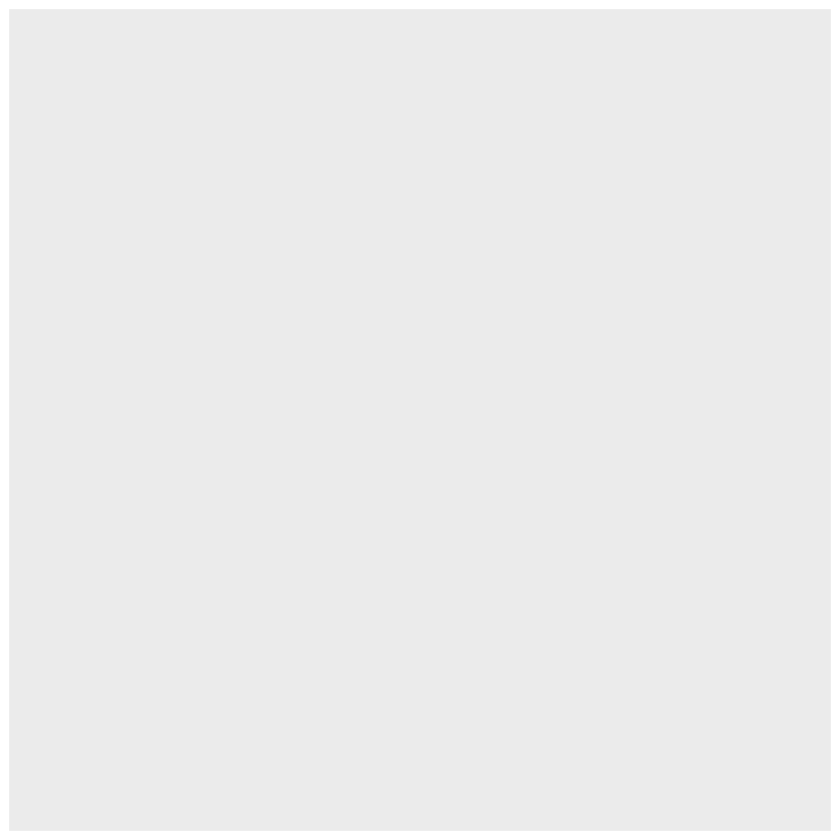

In [23]:
ice_df |> ggplot()

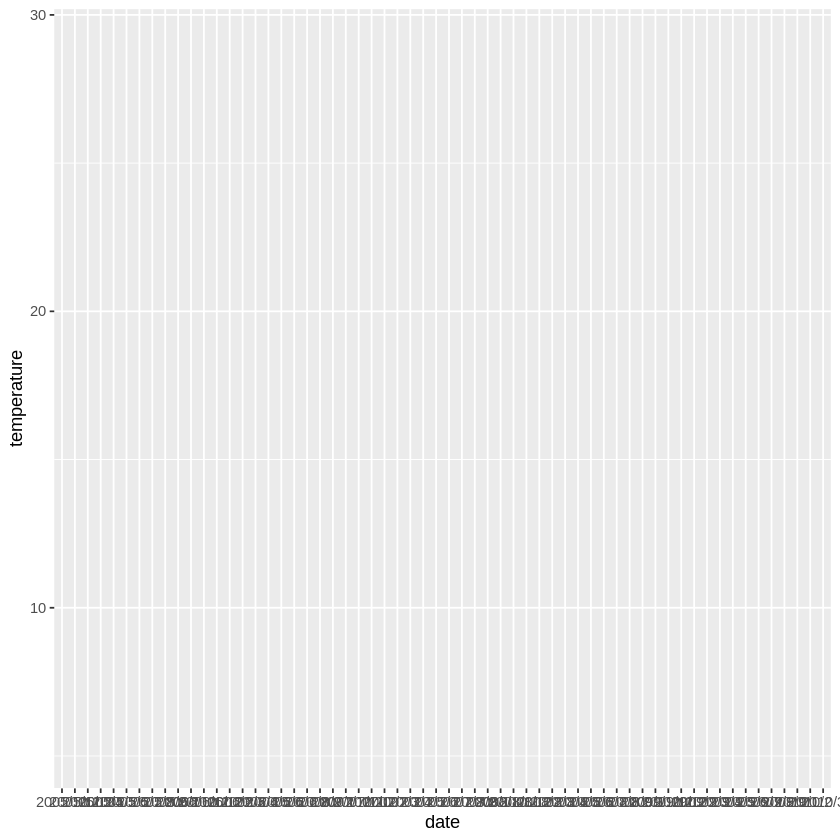

In [24]:
ice_df |> ggplot() + aes(x=date, y=temperature)

https://i-doctor.sakura.ne.jp/font/?p=44373

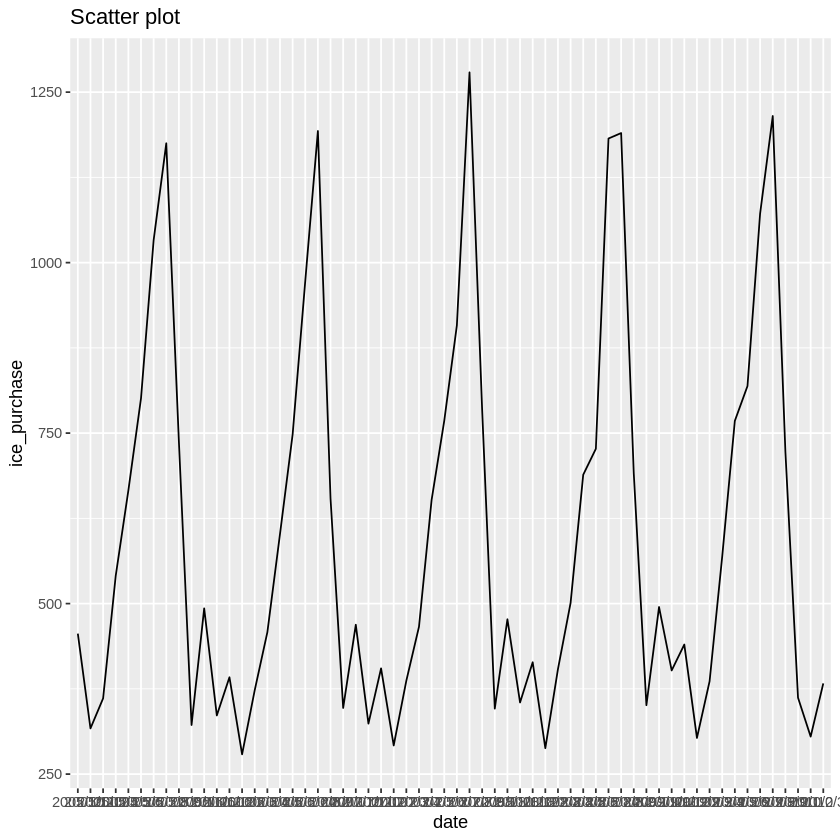

In [29]:
ice_df |> ggplot() + aes(x=date, y=ice_purchase, group=1) + geom_line() +
 labs(title="Scatter plot")

x軸のラベルを90度回転して読みやすくします。

https://qiita.com/hoxo_m/items/1a0b71b5868686311747

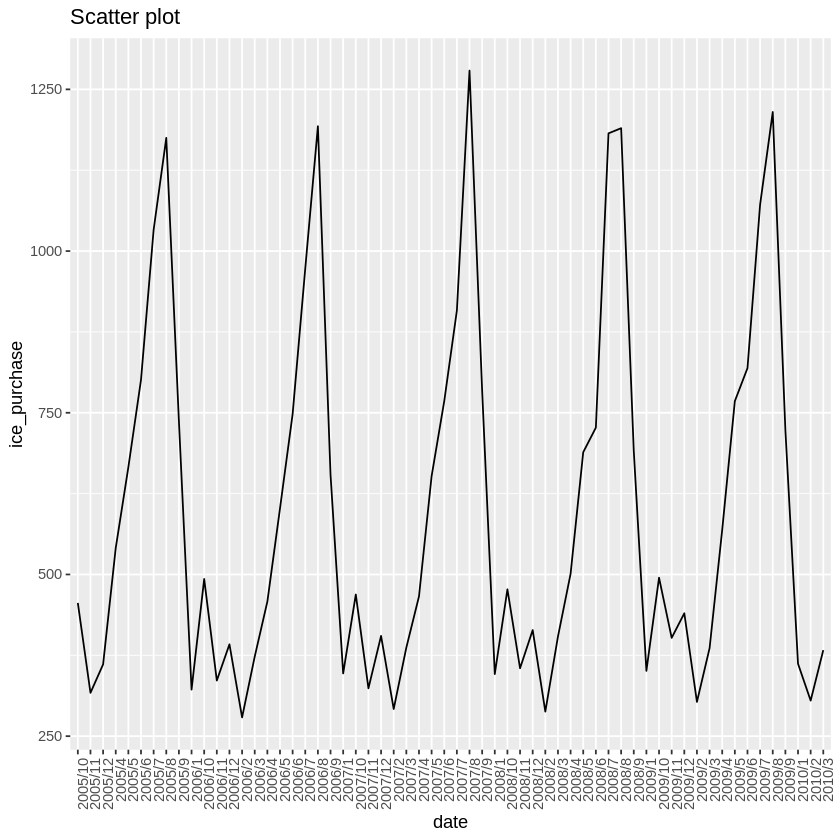

In [30]:
ice_df |> ggplot() + aes(x=date, y=ice_purchase, group=1) +
 geom_line()  + labs(title="Scatter plot") + theme(axis.text.x = element_text(angle = 90, hjust = 1))

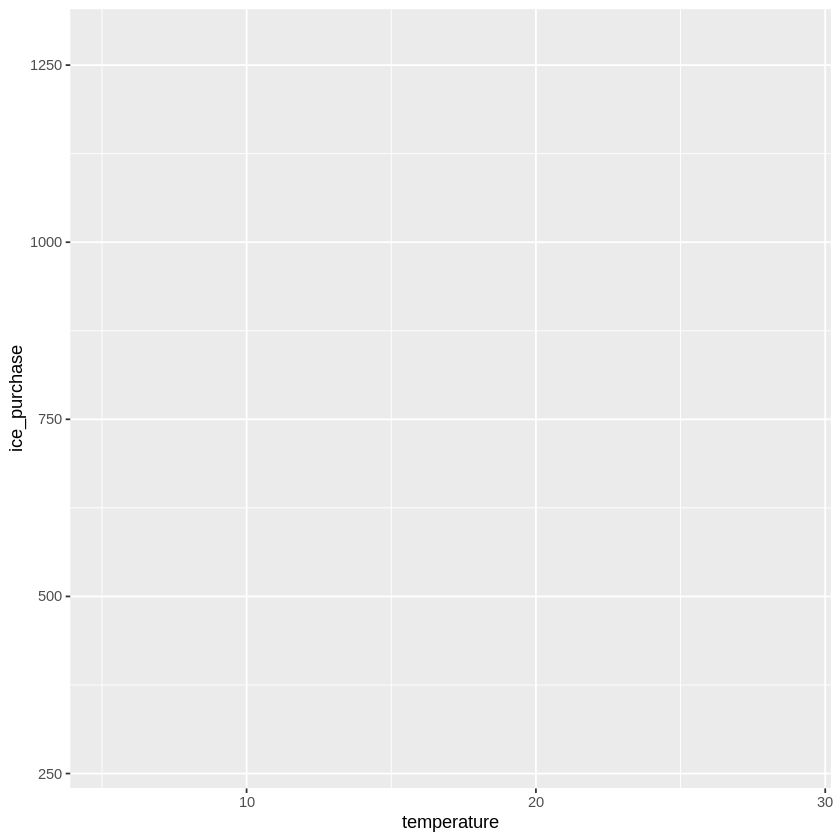

In [31]:
ice_df |> ggplot() + aes(x=temperature, y=ice_purchase, group=1) 

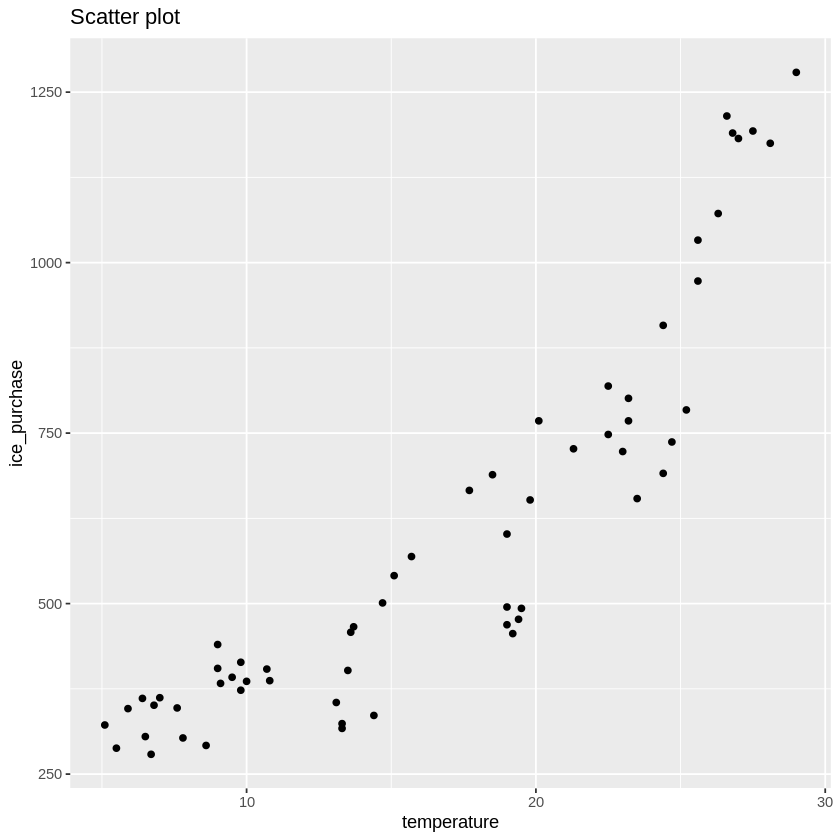

In [32]:
ice_df |> ggplot() + aes(x=temperature, y=ice_purchase) + geom_point() +
 labs(title="Scatter plot")

**グラフをきれいに並べる**

In [34]:
install.packages("patchwork")
require(patchwork)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: patchwork



In [33]:
ice_df |> ggplot() + aes(x=date, y=temperature, group=1) + geom_line() +
 theme(axis.text.x = element_text(angle = 90, hjust = 1)) -> p1
ice_df |> ggplot() + aes(x=date, y=ice_purchase, group=1) + geom_line() +
 theme(axis.text.x = element_text(angle = 90, hjust = 1)) -> p2
ice_df |> ggplot() + aes(x=temperature, y=ice_purchase, group=1) + geom_point() +
 theme(axis.text.x = element_text(angle = 90, hjust = 1)) -> p3

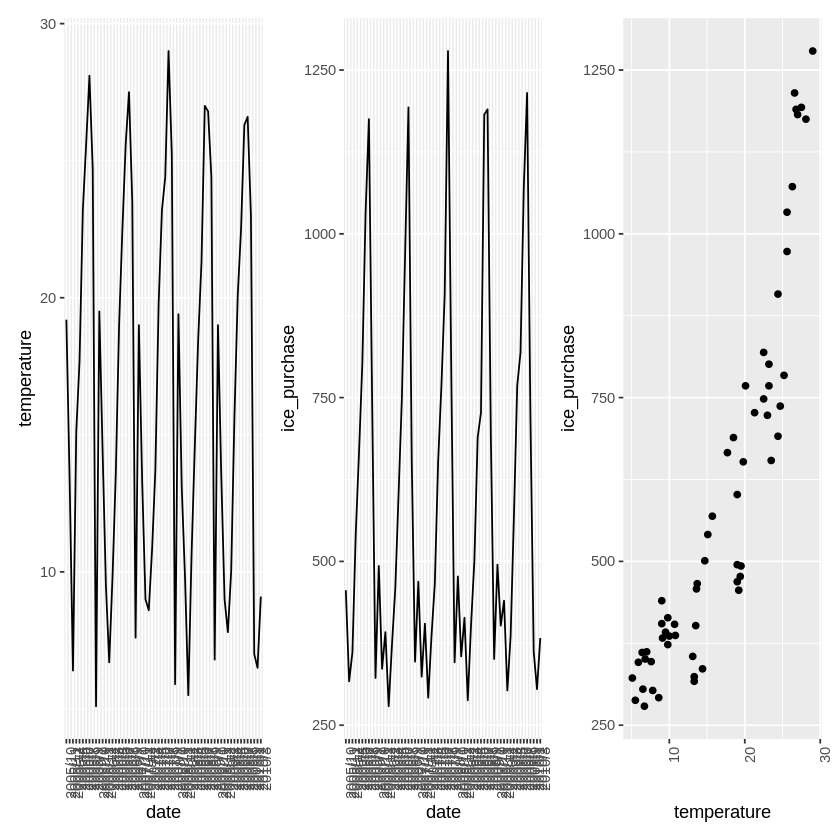

In [35]:
p1 + p2 + p3

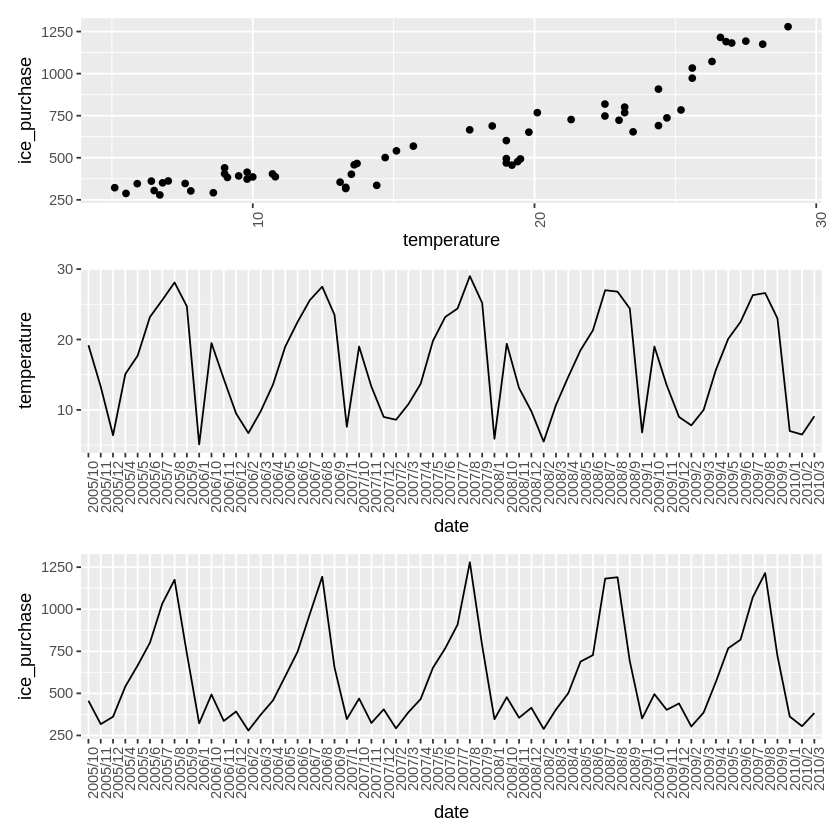

In [36]:
p3 / p1 / p2  

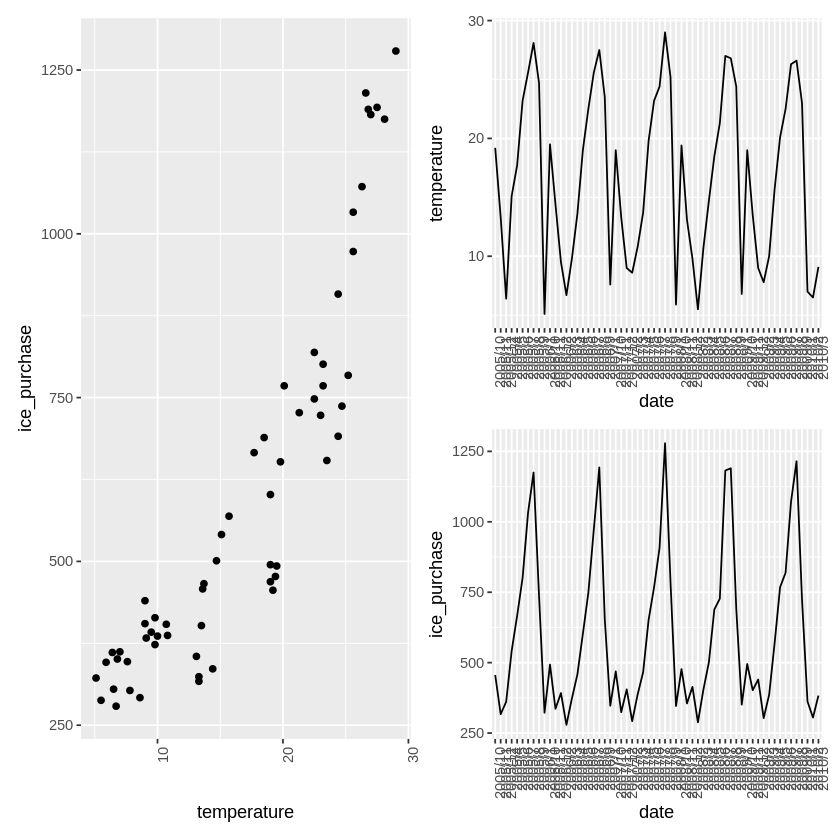

In [37]:
p3 + p1 / p2  

**ggthemesを使ってグラフのデザインを変える**

ggthemesはウォール・ストリート・ジャーナル（WSJ）風のグラフなどちょっと凝ったデザインのグラフを作ってくれるパッケージです。

https://yutannihilation.github.io/allYourFigureAreBelongToUs/ggthemes/

In [38]:
install.packages("ggthemes")
require(ggthemes)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggthemes



In [39]:
ice_df |> ggplot() + aes(x=date, y=temperature, group=1) + geom_line() +
 theme_wsj() + theme(axis.text.x = element_text(angle = 90, hjust = 1)) -> p1
ice_df |> ggplot() + aes(x=date, y=ice_purchase, group=1) + geom_line() +
 theme_wsj() + theme(axis.text.x = element_text(angle = 90, hjust = 1)) -> p2
ice_df |> ggplot() + aes(x=temperature, y=ice_purchase, group=1) +
 geom_point() + theme_wsj() + theme(axis.text.x = element_text(angle = 90, hjust = 1)) -> p3

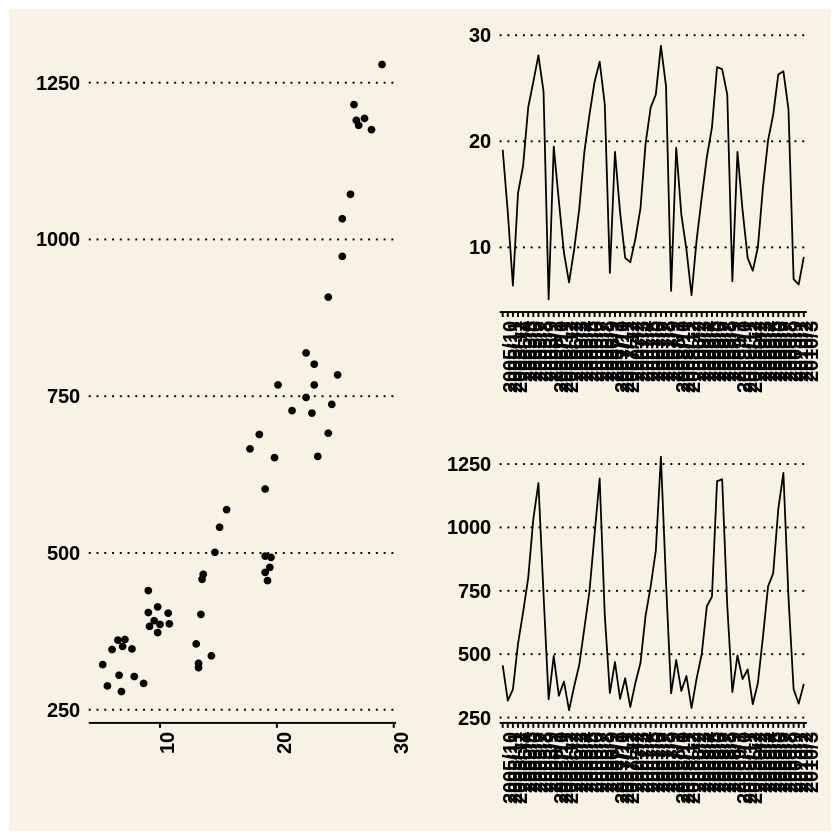

In [40]:
p3 + p1 / p2  

**手間を掛けずにキレイなグラフを**

ggplot2やその拡張パッケージを使って、手間を掛けずにキレイなグラフを作りましょう。